# Data Analysis on Crime Incidents In Chicago from 2012 to 2017

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
first_set = pd.read_csv(r"crimes-in-chicago/Chicago_Crimes_2012_to_2017.csv")

# giving the relative path for .csv file.
crimes.head()


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,NewDate,MonthNo,Month
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",2016-05-03,05,May
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",2016-05-03,05,May
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",2016-05-03,05,May
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",2016-05-03,05,May
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",2016-05-03,05,May


In [28]:
#lets find number of crimes types and count of each of the type.
crime_count = pd.DataFrame(crimes.groupby('Primary Type').size().sort_values(ascending=False).rename('Count').reset_index())
crime_count.head()

,Primary Type,Count
0,THEFT,326967
1,BATTERY,261726
2,CRIMINAL DAMAGE,154150
3,NARCOTICS,134829
4,ASSAULT,90515


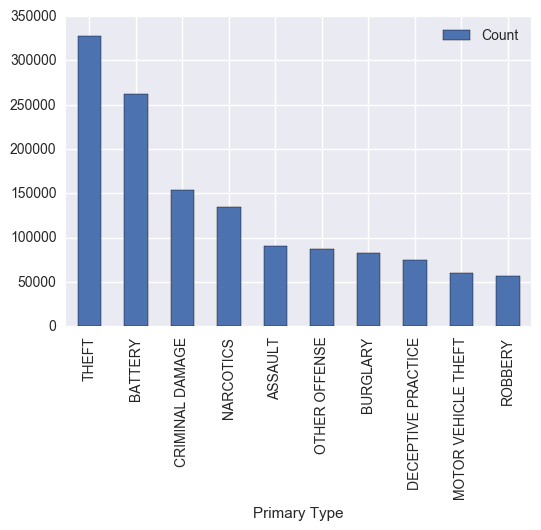

In [30]:
#top 10 crime incidents in this time frame for chicago!
crime_count[:10].plot(x='Primary Type',y='Count',kind='bar')

In [7]:
#find number of incidents that have taken place in a particular location description!
crime_location = pd.DataFrame(crimes.groupby('Location Description').size().sort_values(ascending=False).rename('Count').reset_index())
crime_location.head()

,Location Description,Count
0,STREET,327787
1,RESIDENCE,231522
2,APARTMENT,183409
3,SIDEWALK,160191
4,OTHER,55321


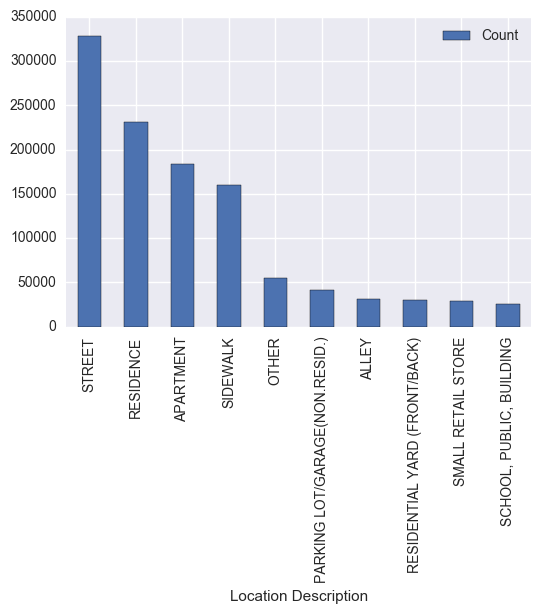

In [9]:
# lets graph red zoned locations where there is a probability of crime rate is very high!
crime_location[:10].plot(x='Location Description',y='Count',kind='bar')

In [10]:
#lets find monthly crimes that took place from 2012 to 2016 in chicago
import calendar
from datetime import datetime
crimes['NewDate'] =  crimes['Date'].apply(lambda x: datetime.strptime(x.split()[0],'%m/%d/%Y'))

In [11]:
crimes['MonthNo'] = crimes['Date'].apply(lambda x: str(x.split()[0].split('/')[0]))

In [12]:
monthDict = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
crimes['Month'] = crimes['MonthNo'].apply(lambda x: monthDict[x])
crimes.head() #plot a graph for monthly crime rate findings in time frame 2012 to 2016!

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,NewDate,MonthNo,Month
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",2016-05-03,05,May
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",2016-05-03,05,May
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",2016-05-03,05,May
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",2016-05-03,05,May
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",2016-05-03,05,May


In [13]:
crime_activity_plot = pd.DataFrame(crimes.groupby(['Month','Year']).size().sort_values(ascending=False).rename('Count').reset_index())
crime_activity_plot.head()

,Month,Year,Count
0,Jul,2012,31945
1,Jun,2012,31052
2,May,2012,30067
3,Aug,2012,30010
4,Aug,2013,28622


In [14]:
crime_activity_plot_2012_2016 = crime_activity_plot.pivot_table(values='Count',index='Month',columns='Year')

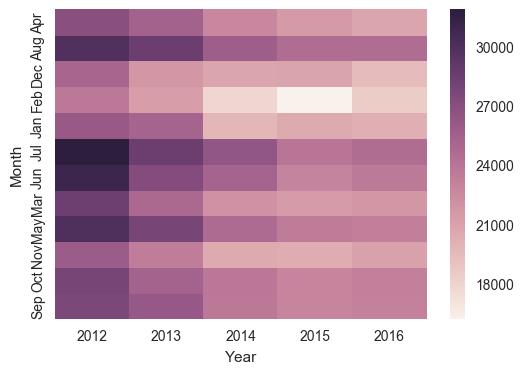

In [15]:
sns.heatmap(crime_activity_plot_2012_2016) # plotting a heath map for graphical presentations of monthly crimes

from matrix plot we can make 2 conclusions: 
2012 and 2013 are highest crime victimed years
june and july are highest crime incidents months in all the years

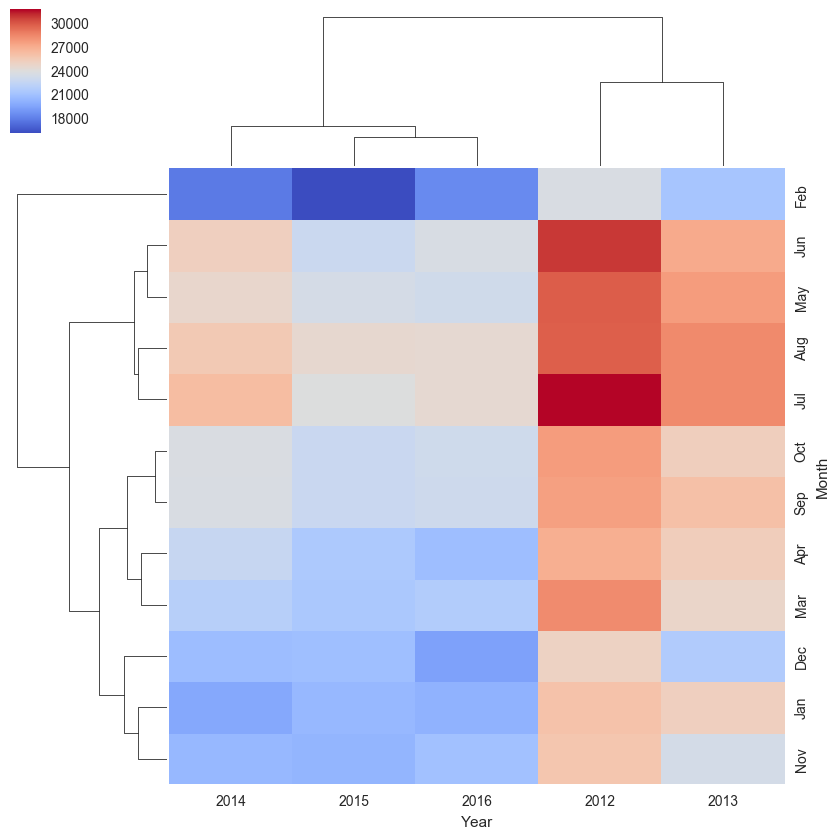

In [16]:
#lets built a matrix plot to have deep clear understanding of the crime rates!.
sns.clustermap(crime_activity_plot_2012_2016,cmap='coolwarm')

#Two more conclusions from the above matrix:
# May, June, July and August are highest crime activities months in 2012 and 2013
#On an average these four months are highest crime incident months from 2012 to 2017!!

# lets do analysis on no:of arrests taken place frpm 2012 to 2016!

In [17]:
arrest_yearly = crimes[['Year','Arrest','Month']]
arrest_yearly_new = arrest_yearly[arrest_yearly['Arrest'] == True]
arrest_yearly_plot = pd.DataFrame(arrest_yearly_new.groupby(['Month','Year']).size().sort_values(ascending=False).rename('Count').reset_index())
arrest_yearly_plot.head()

,Month,Year,Count
0,Jul,2012,8435
1,Mar,2012,8396
2,May,2013,8084
3,Jun,2012,8034
4,May,2012,7893


In [18]:
arrest_yearly_matrix = arrest_yearly_plot.pivot_table(values='Count',index='Month',columns='Year')

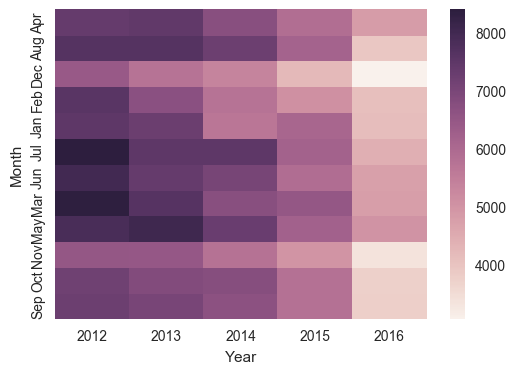

In [19]:
sns.heatmap(arrest_yearly_matrix)

#from above matrix we can see that arrests were highest from 2012 to 2014. 
#And there was a trend in decrease number of areests from from 2012 to 2017.
#Here we have a scope of assumption that crime incidents would have probably dropped down from 2012 to 2017.! Five year period there is drop in crime rate. 


#To support above statements we will visualize the arrest VS crime rate graphs.

In [20]:
crime_activity = pd.DataFrame(crimes.groupby('Year').size().rename('Count').reset_index())
crime_activity
arrest = crimes[['Year','Arrest']]
arrest_new = arrest[arrest['Arrest'] == True]
arrest_activity = pd.DataFrame(arrest_new.groupby('Year').size().rename('Count').reset_index())
arrest_activity

,Year,Count
0,2012,90511
1,2013,86219
2,2014,79057
3,2015,69397
4,2016,50386


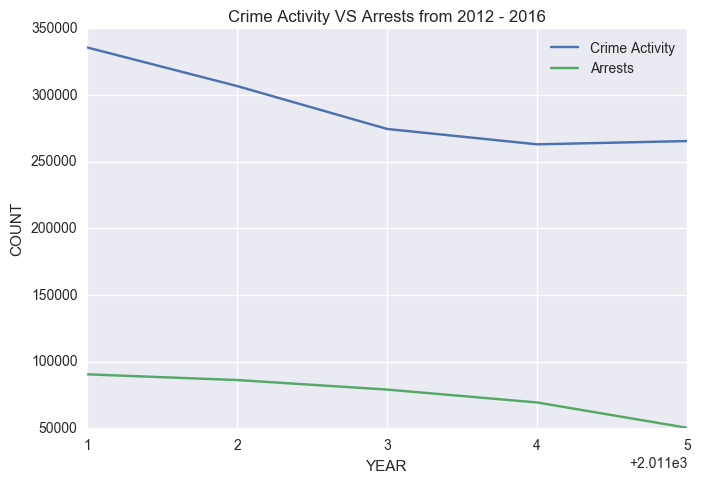

In [21]:
import matplotlib.ticker as ticker
x=['2012','2013','2014','2015','2016']
y=crime_activity['Count']
z=arrest_activity['Count']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.plot(x,y,label='Crime Activity')
ax.plot(x,z,label='Arrests')
ax.set_ylabel("COUNT")
ax.set_xlabel("YEAR")
ax.set_title("Crime Activity VS Arrests from 2012 - 2016")
ax.legend()

Conclusion
From the graph above there is clear evidence that there is decrese in crime rate from 2012 to 2017---->as a result there is drop in arrest rate too.

Another point to be taken note here is there is around 2,00,000 difference in crimes and number of arrests. May be the government would have taken more effective measures in handling crime incidents.

If we see the plot most crimes happen from May-August----> may be this is because its summer time and people would be on vacations more chances of attacks.